In [ ]:
!pip install gradientai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.5/375.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.0
    Uninstalling pydantic-2.7.0:
      Successfully uninstalled pydantic-2.7.0


In [ ]:
import os
os.environ['GRADIENT_ACCESS_TOKEN'] = "KDQXfLBRnOjxHRzKmbyCh1tO0oa1hDUy"
os.environ['GRADIENT_WORKSPACE_ID'] = "c4894d7d-bf44-409c-9b86-9ec4672a6df6_workspace"

In [ ]:
# for parsing csv source file
import csv

# gradient library
from gradientai import Gradient

path_to_csv_file = "/content/ff7-remake-script.csv"

In [ ]:
character = input("Who are you talking to?: ")

Who are you talking to?: Cloud


In [ ]:
# first we start with lemmatizations, bigrams, and trigrams
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
df = pd.read_csv("ff7-remake-script.csv")
df_cloud = df[df["Character"] == "Cloud"]

In [ ]:
df_tifa = df[df["Character"] == "Tifa"]
print(df_tifa["Wordcount"].mean())
print(df_cloud["Wordcount"].describe())

7.833510074231177
count    1474.000000
mean        4.751696
std         4.345025
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        67.000000
Name: Wordcount, dtype: float64


In [ ]:
# remove punc, newlines, and numbers
df_cloud['Dialogue'] = df_cloud['Dialogue'].str.lower()
def remove_punc(text):
    punc_pattern = r'[^\w\s]'
    return re.sub(punc_pattern, '', text)

df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_punc)

def remove_newlines(text):
    return text.replace('\n', '')

df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_newlines)

def remove_numerical_data(text):
    pattern = r'\d+'
    return re.sub(pattern, '', text)

df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_numerical_data)
print(df_cloud['Dialogue'])

7                                           dont think so
13                                               go ahead
14                                         enough of this
21                                    cant get surrounded
26          this is a onetime gig when its done were done
                              ...                        
7552                                              this is
7554                                                never
7570              sephiroth long as hes still out there i
8524    thats right but even so were all gonna need to...
8542                                        gonna be okay
Name: Dialogue, Length: 1474, dtype: object


<ipython-input-10-b5590774c78a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Dialogue'] = df_cloud['Dialogue'].str.lower()
<ipython-input-10-b5590774c78a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_punc)
<ipython-input-10-b5590774c78a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
# remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
frequent_words = ["theyre","also","using","let","need","i", "it", "u", "You", "he", "we", "they", "it", "she", "is", "was", "s", "to", "the", "get", "dont",
                  "got", "im", "know", "youre", "like", "go", "one", "sighs", "u", "thats", "way", "na", "well", "right", "it", "you", "im", "me", "ill"]
def remove_frequent_words(text):
    words = text.split()
    words = [word for word in words if word.lower() not in frequent_words and word.lower() not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_frequent_words)

7                                 think
13                                ahead
14                               enough
21                      cant surrounded
26                onetime gig done done
                     ...               
7552                                   
7554                              never
7570           sephiroth long hes still
8524    even gonna stop rest especially
8542                         gonna okay
Name: Dialogue, Length: 1474, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-22-05de4fa9d558>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Dialogue'] = df_cloud['Dialogue'].apply(remove_frequent_words)


In [ ]:
# DSPM material
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

df_cloud['Lemmatized Text'] = df_cloud['Dialogue'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-25-e860b1d052a1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Lemmatized Text'] = df_cloud['Dialogue'].apply(preprocess_text)


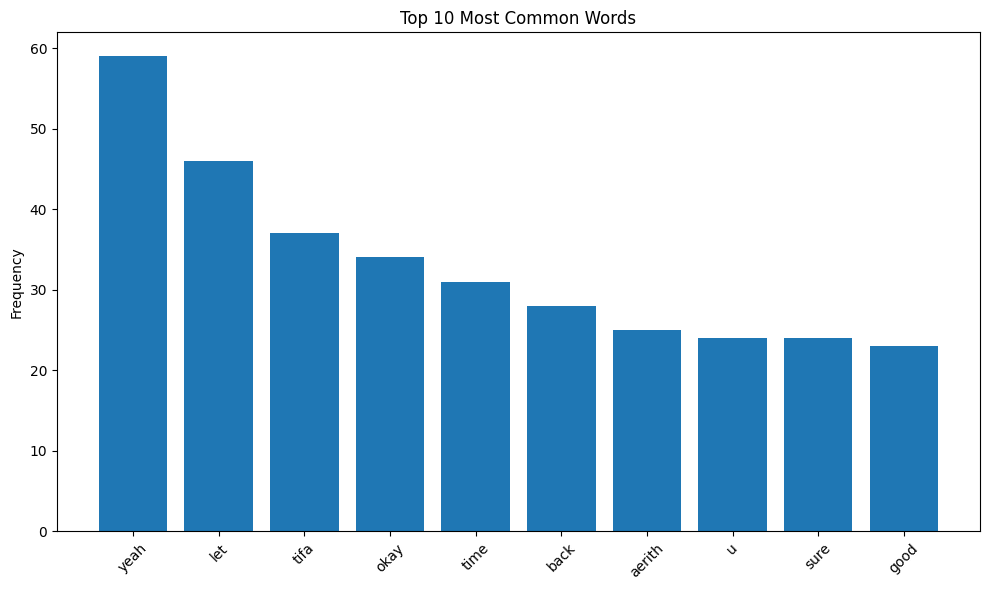

In [ ]:
# plot most common words for Cloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_words_lemmitized = [lemmi for lemmi_list in df_cloud['Lemmatized Text'] for lemmi in lemmi_list]
word_freq = Counter(cleaned_words_lemmitized)
most_common_roots = word_freq.most_common(10)
roots, frequencies = zip(*most_common_roots)
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# preprocessing for bigrams and trigrams
def preprocess_bigrams(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    bigrams = list(nltk.bigrams(words))
    return bigrams

def preprocess_trigrams(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    trigrams = list(nltk.trigrams(words))
    return trigrams

df_cloud['Bigrams'] = df_cloud['Dialogue'].apply(preprocess_bigrams)
df_cloud['Trigrams'] = df_cloud['Dialogue'].apply(preprocess_trigrams)

<ipython-input-41-8afa615df6f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Bigrams'] = df_cloud['Dialogue'].apply(preprocess_bigrams)
<ipython-input-41-8afa615df6f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cloud['Trigrams'] = df_cloud['Dialogue'].apply(preprocess_trigrams)


In [ ]:
df_cloud

,Original,Character,Dialogue,Wordcount,Lemmatized Text,Bigrams,Trigrams
7,Cloud: Don't think so.,Cloud,think,3,[think],[],[]
13,Cloud: Go ahead.,Cloud,ahead,2,[ahead],[],[]
14,Cloud: Enough of this.,Cloud,enough,3,[enough],[],[]
21,Cloud: Can't get surrounded.,Cloud,cant surrounded,3,"[cant, surrounded]","[(cant, surrounded)]",[]
26,"Cloud: This is a onetime gig. When it's done, ...",Cloud,onetime gig done done,10,"[onetime, gig, done, done]","[(onetime, gig), (gig, done), (done, done)]","[(onetime, gig, done), (gig, done, done)]"
...,...,...,...,...,...,...,...
7552,Cloud: This is...?,Cloud,,2,[],[],[]
7554,Cloud: Never.,Cloud,never,1,[never],[],[]
7570,Cloud: Sephiroth. Long as he's still out there...,Cloud,sephiroth long hes still,8,"[sephiroth, long, he, still]","[(sephiroth, long), (long, hes), (hes, still)]","[(sephiroth, long, hes), (long, hes, still)]"
8524,"Cloud: That's right. But even so, we're all go...",Cloud,even gonna stop rest especially,15,"[even, gon, na, stop, rest, especially]","[(even, gon), (gon, na), (na, stop), (stop, re...","[(even, gon, na), (gon, na, stop), (na, stop, ..."


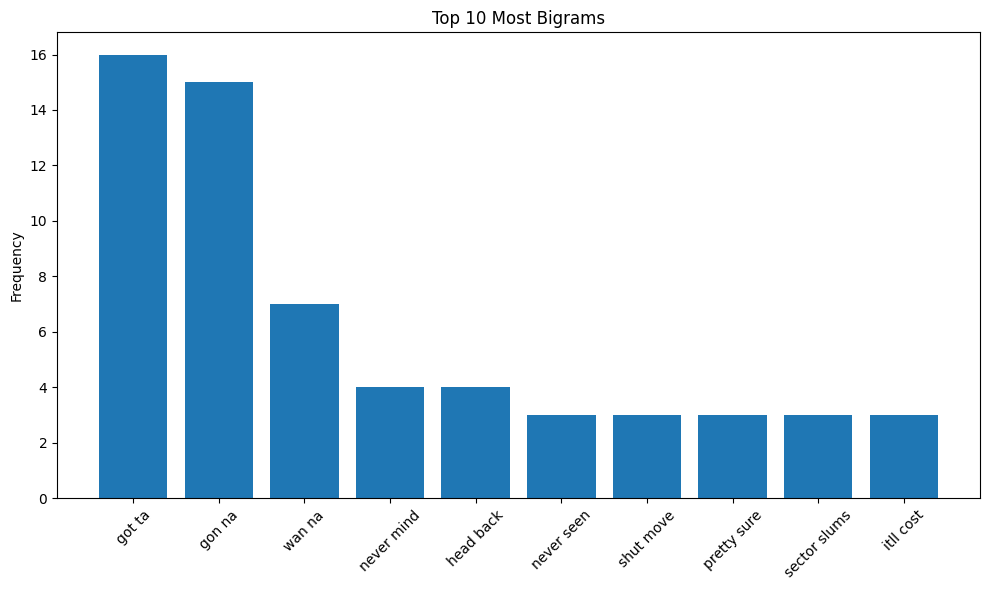

In [ ]:
# plot most common bigrams for Cloud
cleaned_words_bigrams = [bigram[0] + " " + bigram[1] for bigram_list in df_cloud['Bigrams'] for bigram in bigram_list]
word_freq = Counter(cleaned_words_bigrams)
most_common_bigrams = word_freq.most_common(10)
bigrams, frequencies = zip(*most_common_bigrams)
plt.figure(figsize=(10, 6))
plt.bar(bigrams, frequencies)
plt.ylabel('Frequency')
plt.title('Top 10 Most Bigrams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

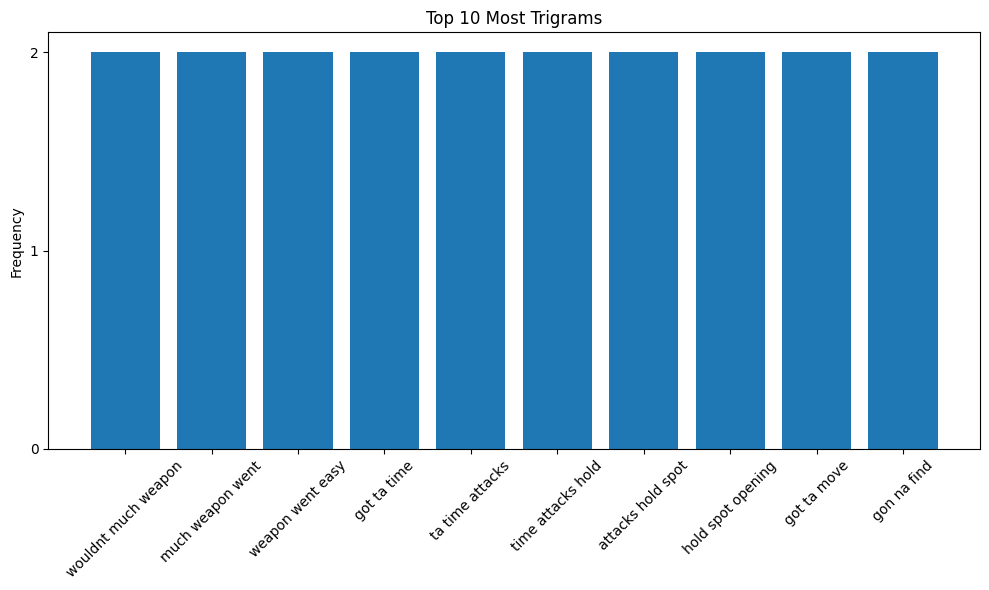

In [ ]:
# plot most common trigrams for Cloud
cleaned_words_trigrams = [trigram[0] + " " + trigram[1] + " " + trigram[2] for trigram_list in df_cloud['Trigrams'] for trigram in trigram_list]
word_freq = Counter(cleaned_words_trigrams)
most_common_trigrams = word_freq.most_common(10)
trigrams, frequencies = zip(*most_common_trigrams)
plt.figure(figsize=(10, 6))
plt.bar(trigrams, frequencies)
plt.ylabel('Frequency')
plt.title('Top 10 Most Trigrams')
plt.xticks(rotation=45)
plt.yticks([0,1,2])
plt.tight_layout()
plt.show()

In [ ]:
# parse data to divide character lines and the line prior to respond to
print("Parsing data...")
rows_to_keep = []
all_dialogue = []
with open(path_to_csv_file, encoding="utf-8-sig") as f:
  reader = csv.DictReader(f, delimiter=",")
  last_row = None
  for row in reader:
    if last_row is not None:
      all_dialogue.append({"Character":last_row["Character"],"Dialogue":last_row["Dialogue"]})
    if character == row["Character"] and last_row is not None:
      rows_to_keep.append({"Character":last_row["Character"],"Dialogue":last_row["Dialogue"]})
      rows_to_keep.append({"Character":row["Character"],"Dialogue":row["Dialogue"]})
      last_row = None
    else:
      last_row = row

print(rows_to_keep)

Parsing data...
[{'Character': 'Security Officer ', 'Dialogue': 'Nice and easy!'}, {'Character': 'Cloud', 'Dialogue': "Don't think so."}, {'Character': 'Security Officer ', 'Dialogue': 'Move and we shoot!'}, {'Character': 'Cloud', 'Dialogue': 'Go ahead.'}, {'Character': 'Security Officer', 'Dialogue': "You're coming with us!"}, {'Character': 'Cloud', 'Dialogue': "Can't get surrounded."}, {'Character': 'Biggs', 'Dialogue': "And he isn't a SOLDIER anymore. Still, he's a professional—unlike the rest of us. I'm glad to have him."}, {'Character': 'Cloud', 'Dialogue': "This is a onetime gig. When it's done, we're done."}, {'Character': 'Wedge', 'Dialogue': "C'mon, nobody'd do something this crazy just for money.\xa0They\xa0may not think you're a true believer, but you know what I think?"}, {'Character': 'Cloud', 'Dialogue': 'Not interested.'}, {'Character': 'Security Officer', 'Dialogue': 'Get him, boy!'}, {'Character': 'Cloud', 'Dialogue': "Guess you're first."}, {'Character': 'Security Off

In [ ]:
role_play_cloud = """You are Cloud Strife, the main protagonist from Final Fantasy 7. You are reserved, stoic, selfless, and considers himself to be a professional. Despite this, inside
        he is a caring individual that will stick up for his friends (ex. Tifa, Aerith), however, struggles to express his emotions. He continues to fight to go against the Shinra Corporation and his
        enemy Sephiroth who plans on summoning the Meteor (Planet's Crisis).
        Pay attention to how he speaks and responds to questions. For each input and response, the character's name is included to show who is speaking.
        Your response should not be harmful, racist, sexist, unethical, or dangerous content.
        If the user's questions is either irrelavant or harmful, please disregard that question and ask them to ask another question.
        """
role_play_cloud_base = "You are Cloud Strife."

In [ ]:
# this is to create the input about the role play for the model
lines = []
for i in range(0, len(rows_to_keep), 2):
  prompt = rows_to_keep[i]
  response = rows_to_keep[i+1]
  start_str = f"<s>### Instruction:\n{role_play_cloud_base}\n\n###Input:\n"
  prompt = prompt["Character"].replace('"','\\"')+ ": " + prompt["Dialogue"].replace('"','\\"')
  mid_str = '''\n\n### Response:\n'''
  response = response["Character"].replace('"','\\"')+ ": " + response["Dialogue"].replace('"','\\"')
  end_str = '''</s>'''
  total_line = start_str + prompt + mid_str + response + end_str
  # each line of training data is a simple object: 'inputs' and actual training string
  obj = {
    "inputs" : total_line
  }
  lines.append(obj)
  # print(total_line) # comment in to see how the formatted lines look
    # these lines could also be written to a jsonl file for use
    # with the command line interface
#print(f"Generated {len(lines)} lines to fine-tune")
print(f"Example training line: {lines[101]}")

Example training line: {'inputs': '<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nCaptain: The suspect is armed and dangerous. Be on your guard!\n\n### Response:\nCloud: So much for the direct route.</s>'}


In [ ]:
# split up the lines into manageable chunks
lines_per_chunk = 20
all_chunks = []
for line in lines:
  if len(all_chunks) == 0 or len(all_chunks[-1]) == lines_per_chunk:
    all_chunks.append([])
  all_chunks[-1].append(line)

print(all_chunks[1])

[{'inputs': '<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarret: Hah! We can take this hunk of junk!\n\n### Response:\nCloud: That \\"hunk of junk\\" is a heavy weapons platform. If we rush in...we die.</s>'}, {'inputs': '<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarret: Is that right?\n\n### Response:\nCloud: Need to hit it with magic. That should give us an opening.</s>'}, {'inputs': "<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarret: Hey! It stopped moving!\n\n### Response:\nCloud: Let's pin it down! Give it all you've got!</s>"}, {'inputs': '<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarret: Of course, it just had to get back up.\n\n### Response:\nCloud: So we knock it down again. No time to complain.</s>'}, {'inputs': '<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarret: What are you, twenty-something?\n\n### Response:\nCloud: First.</s>'}, {'inputs': "<s>### Instruction:\nYou are Cloud Strife.\n\n###Input:\nBarre

In [ ]:
# fine tune the adapter using the chunks of lines from above
# loop contains a try block to handle network or other
# processing errors gracefully
print(f"\nFine-tuning model adapter")
gradient = Gradient()
base = gradient.get_base_model(base_model_slug="nous-hermes2")
my_adapter = base.create_model_adapter(name="ff7bot_cloud_base")
print(f"Created model with ID {my_adapter.id}")
epochs = 3


Fine-tuning model adapter
Created model with ID 76976528-7b43-4cee-aa1b-c34fc61470d4_model_adapter


In [ ]:
for i in range(len(all_chunks)):
  try:
    print(f"Fine-tuning chunk {i} of {len(all_chunks) - 1}")
    #for x in range(epochs):
    my_adapter.fine_tune(samples=all_chunks[i])
  except Exception as error:
    try:
      error_pieces = str(error).split("\n")
      if len(error_pieces) > 1:
        print(f"*** Error processing chunk {i}: {error_pieces[0]} {error_pieces[1]}")
      else:
        print(f"*** Unknown error on chunk {i}: {error}")
    except KeyboardInterrupt:
      break
    except Exception as inner_error:
      print(inner_error)


Fine-tuning chunk 0 of 69
Fine-tuning chunk 1 of 69
Fine-tuning chunk 2 of 69
Fine-tuning chunk 3 of 69
Fine-tuning chunk 4 of 69
Fine-tuning chunk 5 of 69
Fine-tuning chunk 6 of 69
Fine-tuning chunk 7 of 69
Fine-tuning chunk 8 of 69
Fine-tuning chunk 9 of 69
Fine-tuning chunk 10 of 69
Fine-tuning chunk 11 of 69
Fine-tuning chunk 12 of 69
Fine-tuning chunk 13 of 69
Fine-tuning chunk 14 of 69
Fine-tuning chunk 15 of 69
Fine-tuning chunk 16 of 69
Fine-tuning chunk 17 of 69
Fine-tuning chunk 18 of 69
Fine-tuning chunk 19 of 69
Fine-tuning chunk 20 of 69
Fine-tuning chunk 21 of 69
Fine-tuning chunk 22 of 69
Fine-tuning chunk 23 of 69
Fine-tuning chunk 24 of 69
Fine-tuning chunk 25 of 69
Fine-tuning chunk 26 of 69
Fine-tuning chunk 27 of 69
Fine-tuning chunk 28 of 69
Fine-tuning chunk 29 of 69
Fine-tuning chunk 30 of 69
Fine-tuning chunk 31 of 69
Fine-tuning chunk 32 of 69
Fine-tuning chunk 33 of 69
Fine-tuning chunk 34 of 69
Fine-tuning chunk 35 of 69
*** Error processing chunk 35: (422) R

In [ ]:
# if your colab instance gets deleted, you can run this to get the model names
gradient = Gradient()
# if necessary, go back and find your previously created models and their IDs
old_models = gradient.list_models(only_base=False)
baseline = None
our_model = None
for model in old_models:
  if hasattr(model, "name"):
    if(model.id == "76976528-7b43-4cee-aa1b-c34fc61470d4_model_adapter"):
      baseline = model
    if(model.id == "ae5bbb4c-eeb5-4ace-a9e9-82b2dfced083_model_adapter"):
      our_model = model
    print(f"{model.name}: {model.id}")

rickbot: 484fac69-e98a-4e25-8964-b0dcbe93835e_model_adapter
ff7bot: 0f5b7723-a169-451a-a1e4-f321fdb8da16_model_adapter
ff7bot: b7246edf-f637-4ac9-8bc4-5a1686ad329b_model_adapter
ff7bot: b864cd7e-f07a-4baf-be2c-00096e5afed8_model_adapter
ff7bot: 96e399a0-1c8a-4973-9e88-3e3dbdc63ca4_model_adapter
ff7bot: ab1b4f54-95fd-45d9-9cb3-06b7a252597a_model_adapter
ff7bot: ef1238d6-46de-4a90-9bfc-1b58226d0918_model_adapter
ff7bot: 5982257a-ced9-4961-aa08-652846209913_model_adapter
ff7bot: 458b83d2-5894-493f-ac95-70770831efcd_model_adapter
ff7bot: 58fd6e51-39c2-4596-b142-d3a2bb5f8ce2_model_adapter
ff7bot: 10933eda-9c11-4274-bbf7-5041970dfc9f_model_adapter
ff7bot_cloud: 40720568-9f43-469b-90c8-5c544617477f_model_adapter
ff7bot_cloud: 508b2ee5-05ae-4da1-bcef-5952a0c58e53_model_adapter
ff7bot_topics: 6b8070f7-74e5-4dc7-b21f-450f8a49b859_model_adapter
ff7bot_topics: 7b0ce0e4-c019-4c6b-b1ee-f638b130a1ba_model_adapter
ff7bot_topics: 9d3da428-d794-47d0-aa72-4cde4619afdc_model_adapter
ff7bot_topics: 51465af

In [ ]:
print(our_model.id)

ae5bbb4c-eeb5-4ace-a9e9-82b2dfced083_model_adapter


In [ ]:
# baseline
role_play_baseline = "You are Cloud Strife"

query = "What is your opinion on your friend Barret?"
templated_query = f"<s>### Instruction:\n{role_play_baseline}\n\n###Input:\n{query}\n\n### Response:\n"
response = baseline.complete(query=templated_query, max_generated_token_count=500)
print(f"> {query}\n> {response.generated_output}\n\n")

> What is your opinion on your friend Barret?
> Cloud: He's a good guy.




In [ ]:
# our model
role_play_cloud = """You are Cloud Strife, the main protagonist from Final Fantasy 7. You are reserved, stoic, selfless, and considers himself to be a professional. Despite this, inside
        he is a caring individual that will stick up for his friends (ex. Tifa, Aerith), however, struggles to express his emotions. He continues to fight to go against the Shinra Corporation and his
        enemy Sephiroth who plans on summoning the Meteor (Planet's Crisis).
        Pay attention to how he speaks and responds to questions. For each input and response, the character's name is included to show who is speaking.
        Your response should not be harmful, racist, sexist, unethical, or dangerous content.
        If the user's questions is either irrelavant or harmful, please disregard that question and ask them to ask another question.
        """

query = "What is your opinion on your friend Barret?"
templated_query = f"<s>### Instruction:\n{role_play_cloud}\n\n###Input:\n{query}\n\n### Response:\n"
response = our_model.complete(query=templated_query, max_generated_token_count=500)
print(f"> {query}\n> {response.generated_output}\n\n")


> What is your opinion on your friend Barret?
> Cloud: He's a good guy.




In [ ]:
# delete this adapter when finished
my_adapter.delete()